# What make regions of Madagascar different?, A textmining approach

I use enterprises statement of activities to characterize economic difference between regions of Madagascar using text mining techniques

## import packages

In [52]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

## Load and clean data

In [53]:
eses=pd.read_csv('/media/herimanitra/DONNEES/TBE/mdg/ese2013_2015.csv')
mask = [i for i,x in  enumerate(eses.REGION) if x in ['nan','na',0.0,1.0,2.0,3.0,4.0,5.0,'5',7.0,"AM","M","N"] ]
eses.loc[mask,'REGION'] =eses.loc[mask,'FIRAIS'].apply(lambda x: str(x)[:2]) 
eses['REGION_NAME']=''
mask=[i for i,x in  enumerate(eses.REGION) if x in [101.0,"10",'11',11.0] ]
eses.loc[mask,'REGION_NAME']='Analamanga'
mask=[i for i,x in  enumerate(eses.REGION) if x in [12.0,"12"] ]
eses.loc[mask,'REGION_NAME']="Vakinankaratra"
mask=[i for i,x in  enumerate(eses.REGION) if x in [13.0,"13"] ]
eses.loc[mask,'REGION_NAME']="Itasy"
mask=[i for i,x in  enumerate(eses.REGION) if x in [14.0,'14'] ]
eses.loc[mask,'REGION_NAME']="Bongolava"
mask=[i for i,x in  enumerate(eses.REGION) if x in ["20",21.0,"21"] ]
eses.loc[mask,'REGION_NAME']="Haute matsiatra"
mask=[i for i,x in  enumerate(eses.REGION) if x in [22.0,'22'] ]
eses.loc[mask,'REGION_NAME']="Amoron'i mania"
mask=[i for i,x in  enumerate(eses.REGION) if x in [23.0,'23'] ]
eses.loc[mask,'REGION_NAME']="Vatovavy Fitovinany"
mask=[i for i,x in  enumerate(eses.REGION) if x in [24.0,'24'] ]
eses.loc[mask,'REGION_NAME']="Ihorombe"
mask=[i for i,x in  enumerate(eses.REGION) if x in ['25',25.0] ]
eses.loc[mask,'REGION_NAME']="Atsimo-Atsinanana"
mask=[i for i,x in  enumerate(eses.REGION) if x in ["30","31",31.0] ]
eses.loc[mask,'REGION_NAME']="Atsinanana"
mask=[i for i,x in  enumerate(eses.REGION) if x in ['32',32.0] ]
eses.loc[mask,'REGION_NAME']="Analanjirofo"
mask=[i for i,x in  enumerate(eses.REGION) if x in [33.0] ]
eses.loc[mask,'REGION_NAME']="Alaotra-Mangoro"
mask=[i for i,x in  enumerate(eses.REGION) if x in ["40","41",41.0] ]
eses.loc[mask,'REGION_NAME']="Boeny"
mask=[i for i,x in  enumerate(eses.REGION) if x in [42.0,"42"] ]
eses.loc[mask,'REGION_NAME']="Sofia"
mask=[i for i,x in  enumerate(eses.REGION) if x in [43.0] ]
eses.loc[mask,'REGION_NAME']="Betsiboka"
mask=[i for i,x in  enumerate(eses.REGION) if x in [44.0,'44'] ]
eses.loc[mask,'REGION_NAME']="Melaky"
mask=[i for i,x in  enumerate(eses.REGION) if x in ["50","51",51.0] ]
eses.loc[mask,'REGION_NAME']="Atsimo-Andrefana"
mask=[i for i,x in  enumerate(eses.REGION) if x in [52.0] ]
eses.loc[mask,'REGION_NAME']="Androy"
mask=[i for i,x in  enumerate(eses.REGION) if x in ['53',53.0] ]
eses.loc[mask,'REGION_NAME']="Anosy"
mask=[i for i,x in  enumerate(eses.REGION) if x in ["54",54.0] ]
eses.loc[mask,'REGION_NAME']="Menabe"
mask=[i for i,x in  enumerate(eses.REGION) if x in ["71"] ]
eses.loc[mask,'REGION_NAME']="Diana"
mask=[i for i,x in  enumerate(eses.REGION) if x in [72.0,'72'] ]
eses.loc[mask,'REGION_NAME']="Sava"
mask= eses.REGION_NAME==''
eses.loc[mask,'REGION_NAME']='Analamanga'

### Concatenate columns of activities statement

In [54]:
eses['Activities']= eses['MainActivity'].map(str) + ' ' + eses['LACTS1'].map(str) + ' ' + eses['LACTS2'].map(str)

### Remove french stop words from statement

In [55]:
from nltk.corpus import stopwords

In [56]:
eses['Activities']= eses['Activities'].apply(lambda x: ' '.join([ j for j in unicode(x,'utf-8').split(' ') if j not in stopwords.words('french')]))

## Apply Stemming to each row of activities declaration

### replace typos in words

In [57]:
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'dtail',' detail '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'achet',' achat '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'commrece',' commerce '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'alimen',' aliment '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'boisso',' boisson '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'boissonns',' boisson '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'cosultant',' consultant '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'dentair',' dentaire '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'loction',' location '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'epcerie',' epicerie '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'societ',' societe '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'fournissuer',' fournisseur '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'madicament',' medicament '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'colecteur',' collecteur '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'marcahandis',' marchandise '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'inveissements',' investissements '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'inveisseurs',' investisseurs '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'produitd',' produits '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'cullture','culture'))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'longement',' logement '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'pauvret',' pauvrete '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'artcl',' articles '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'transpotr',' transport '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'maintence',' maintenance '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'marchandig','marchandises'))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'machandise',' marchandise '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'cosommer',' consommer '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'cosommabl',' consommable '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'epicerieau',' epicerie  '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'cullture',' culture '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'conructiion',' construction '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'consruction',' construction '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'product',' produits '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'marcandise',' marchandise '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'generl',' generale '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'qincaillerie',' quincaillerie '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'quincailleirie',' quincaillerie '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'collecteurd',' collecteur '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'marcchandis',' marchandise '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'inveigation',' investigation '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'materiell', ' materiels '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'maitece',' maintenance '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'commercce',' commerce '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'detai',' detail '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'exploitatant',' exploitant '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'imprsions',' impression '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'intrat',' intrant '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'reproduitsion',' reproduction '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'srvice',' service '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'pduit',' produits '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'pduits',' produits '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'burea',' bureau '))

In [58]:
from nltk.stem.snowball import FrenchStemmer

In [59]:
eses['Activities']= eses['Activities'].apply(lambda x:FrenchStemmer().stem(x))

### remove some useless words

In [60]:
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'nan',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'etre',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'ub',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'st',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'sien',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'une',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'es',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'ae',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'ja',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'inr',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'frsde',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'uc',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'jouir',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'jour',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'masaka',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'aambo',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'prit',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'tk',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'produite',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'legers',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'ponsabiliser',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'12',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'24',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'lll',' '))
eses['Activities']=eses['Activities'].apply(lambda x: string.replace(x,'lojy',' '))
#to be removed next time
#[u'09', u'alimentation', u'indi', u'sation'

### remove all non-alphabet characters

In [61]:
#eses['Activities']=eses['Activities'].apply(lambda x: re.sub("[^a-zA-Z]+", "",x))

### strip blank space from both side

In [62]:
eses['Activities']=eses['Activities'].apply(lambda x: x.strip())

## Word cloud of activities in the  Malagasy economy 

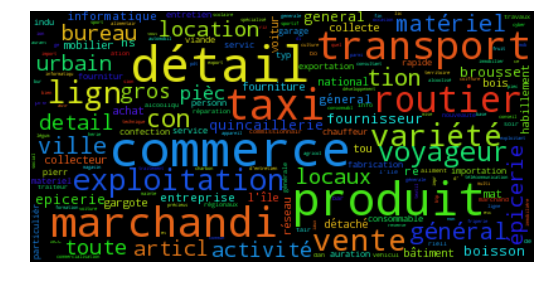

In [63]:
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(' '.join(eses.Activities))
plt.figure(figsize=(9,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We can see that Malagasy economy is essentially small and medium trade driven

### Word cloud activities of Analamanga

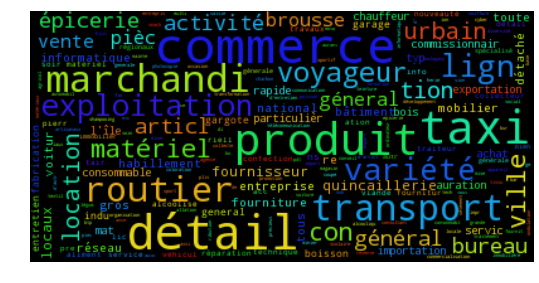

In [64]:
mask= eses.REGION_NAME=='Analamanga'
mysubset=eses.loc[mask,'Activities']
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(' '.join(mysubset))
plt.figure(figsize=(9,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Essential traits of the Malagasy Economy is dominated by Analamanga's activities

### Word cloud activities of Sava (cradle of Vanilla)

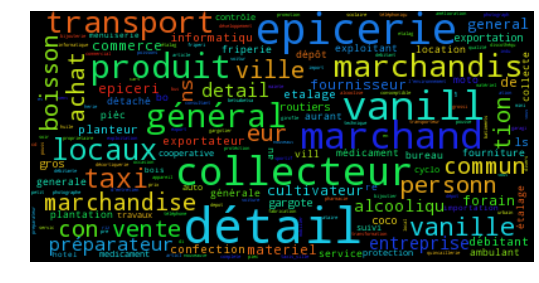

In [65]:
mask= eses.REGION_NAME=='Sava'
mysubset=eses.loc[mask,'Activities']
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(' '.join(mysubset))
plt.figure(figsize=(9,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We can clearly see what makes Sava different from other region such as Analamanga: 'collecte de vanille'

We can further extend our analysis by weighting keywords associated to activities by region using TF-IDF technique

## Weighting activities by region using TF-IDF

### step1: Build a corpus composed of region statement of activities

In [66]:
mycorpus=[]
for r in eses.REGION_NAME.unique():
    X=eses.loc[eses.REGION_NAME==r,'Activities']
    mycorpus.append(' '.join(X))

### compute TF-IDF for each keywords and store them

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=2)
X = vectorizer.fit_transform(mycorpus)
idf = vectorizer.idf_
mydict= dict(zip(vectorizer.get_feature_names(), idf))

## Top 10 activities statement weighted via TF-IDF that are specific to each region 

In [68]:
for i in range(0,22):
    myactivities=[k for k in np.unique(mycorpus[i].split(' ')) if k in vectorizer.get_feature_names()]
    mysort=np.argsort([mydict[k] for k in myactivities] )[::-1]   
    print [eses.REGION_NAME.unique()[i],[myactivities[j] for j in mysort[:10]]]

['Anosy', [u'09', u'alimentation', u'indi', u'sation', u'sauvage', u'amicale', u'bienfaisanc', u'interactive', u'exi', u'epic\xe9ri']]
['Sava', [u'aire', u'p\xe2tisseri', u'gouss', u'photovoltaiqu', u'photographi', u'communaute', u'flor', u'commercant', u'maite', u'manutentionnaire']]
['Vatovavy Fitovinany', [u'complements', u'province', u'dom\xe9', u'quotidienne', u'relance', u'tull', u'hopital', u'comsomptible', u'gru', u'gisement']]
['Analamanga', [u'cosm\xe9tique', u'danse', u'demand', u'degros', u'pomme', u'pomp', u'pompe', u'pondance', u'defense', u'ponsable']]
['Analanjirofo', [u'dechet', u'aquarium', u'menui', u'letchi', u'connection', u'indien', u'epcerie', u'bagag', u'moellon', u'special']]
['Itasy', [u'\xe9ven', u'proc', u'fournture', u'geom\xe8tre', u'ib', u'leg', u'locaus', u'machefer', u'menag\xe8r', u'natt']]
['Atsinanana', [u'09', u'certification', u'infirmerie', u'sionnair', u'indivuduel', u'inc', u'amendements', u'chairs', u'impotration', u'import\xe9']]
['Boeny', [u'

This TFIDF ranking shows us principal characteristics of regions ( early conclusion):

 * Anosy is a region of little trade
 
 * Sava is a region of Vanilla through keyword: 'gouss' which refers to Vanilla pod in english
 
 * Vatovavy Fitovinany is a region of mineral deposits
 
 * Analanjirofo is a cattle region
 
 * Vakinankaratra is a marmalade producer region
 
 * Analanjirofo is a region of collectors of Litchis
 
 * Menabe is a region of traditional healers
 
 * Amoron'i Mania is a region of fish farming
 
 * Ihorombe is a region of  traditional healers
 
 * Sofia is a region of 'operateur' which means business traders
 
 * Diana is a region producer of alcohol drink
